In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
# from sklearn.utils import shuffle
import cv2
from keras.utils import np_utils
# from tensorflow.keras import datasets, layers, models,Model
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
from multiprocessing import Pool

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!7z x /content/drive/MyDrive/temp.7z

In [3]:
def load_samples():
    data = pd.read_csv("/content/drive/MyDrive/sampled_dataset_final.csv",index_col=0)  
    c=0
    for i,row in data.iterrows():
      samples.append([x for x in row])
      # c+=1
      # if(c==100):
        # break
  
    return samples

In [ ]:
samples=[]
samples=load_samples()
print (samples[0:5])
print(len(samples))

[['ID_00097c8de', 0, 0, 0, 0, 0, 0], ['ID_001138955', 0, 0, 0, 0, 0, 0], ['ID_00122094f', 0, 0, 0, 0, 0, 0], ['ID_00138d8b0', 0, 0, 0, 0, 0, 0], ['ID_00159cf4c', 0, 0, 0, 0, 0, 0]]
14146


In [4]:
def create_model():
  model=models.Sequential()
  model.add(layers.Conv2D(16,kernel_size=(3, 3), activation='relu', input_shape=(275,275,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=(2, 2)))

  # model.add(layers.BatchNormalization())

  # normliztion to use overfitting use drop out only in full connected network ie dense layer

  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=(2, 2)))

  # model.add(layers.BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(16, activation='relu'))
  # model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(5,activation='sigmoid'))
  return model


In [ ]:
bone_model=create_model()
brain_model=create_model()
blood_model=create_model()

In [ ]:
combined=layers.concatenate([bone_model.output,brain_model.output,blood_model.output])
combined_model = layers.Dense(15, activation="relu")(combined)
combined_model = layers.Dense(5, activation="sigmoid")(combined_model)


In [ ]:
model = Model(inputs=[bone_model.input, brain_model.input,blood_model.input], outputs=combined_model)


In [ ]:
model.summary()

In [ ]:
#TO load data it might be slower so if it takes long time terminate and execute the code on next cell
#where i have use multiprocessing


data = pd.read_csv("/content/drive/MyDrive/temp/sampled_1000.csv",index_col=0)
samples=[]  
c=0
bone_input=[]
brain_input=[]
blood_input=[]
label=[]
for i,row in data.iterrows():
    samples.append([x for x in row])
    # c+=1
    # if(c==500):
    #   break
for batch_sample in samples:
                # Load image (X)
  filename_bone = '/content/drive/MyDrive/temp/bone_window/'+batch_sample[0]+'.png'
  filename_brain = '/content/drive/MyDrive/temp/brain_window/'+batch_sample[0]+'.png'
  filename_blood = '/content/drive/MyDrive/temp/blood_window/'+batch_sample[0]+'.png'
  image = cv2.imread(filename_bone)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  bone_input.append(image)

  # y = [x for x in batch_sample[2:]]
  image = cv2.imread(filename_brain)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  brain_input.append(image)

  image = cv2.imread(filename_blood)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blood_input.append(image)

  label.append([x for x in batch_sample[2:]])
bone_input = np.array(bone_input)/255.0
bone_input = bone_input.reshape(bone_input.shape[0], bone_input.shape[1], bone_input.shape[2], 1)

brain_input = np.array(brain_input)/255.0
brain_input = brain_input.reshape(brain_input.shape[0], brain_input.shape[1], brain_input.shape[2], 1)

blood_input = np.array(blood_input)/255.0
blood_input = blood_input.reshape(brain_input.shape[0], brain_input.shape[1], brain_input.shape[2], 1)

# m=tf.convert_to_tensor(m)
label= np.array(label)
# n=tf.convert_to_tensor(n)


In [ ]:
label


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [5]:
#It is one of two cell to load images faster using multiprocessing if upper cell is executed no need to run

data = pd.read_csv("/content/drive/MyDrive/sampled_dataset_final.csv",index_col=0)
samples=[]  
c=0
bone_input=[]
brain_input=[]
blood_input=[]
label=[]
for i,row in data.iterrows():
    samples.append([x for x in row])
    c+=1
    if(c==500):
      break

def load_bone_images(samples):
  filename_bone = '/content/temp/bone_window/'+samples[0]+'.png'
  image = cv2.imread(filename_bone)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return np.array(image)

def load_brain_images(samples):
  filename_bone = '/content/temp/brain_window/'+samples[0]+'.png'
  image = cv2.imread(filename_bone)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

def load_blood_images(samples):
  filename_bone = '/content/temp/blood_window/'+samples[0]+'.png'
  image = cv2.imread(filename_bone)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

def load_label(samples):
  # label.append([x for x in batch_sample[2:]])
  return [x for x in samples[2:]];


In [12]:
#It is the second portion to load images using multiprocessing
bone_input=np.array([])
brain_input=np.array([])
bllod_input=np.array([])
# brain_input=[]
# blood_input=[]
label=[]
with Pool(5) as p:
  bone_input=np.append(bone_input,p.map(load_bone_images, samples))
  # bone_input=bone_input[0].copy
  # bone_input = np.asarray(bone_input)
  # bone_input=np.true_divide(bone_input,255.0)
  bone_input = bone_input.reshape(500, 275, 275, 1)

  brain_input.append(p.map(load_brain_images, samples))
  brain_input=brain_input[0]
  brain_input = np.asarray(brain_input)
  brain_input=np.true_divide(brain_input,255.0)
  brain_input = brain_input.reshape(brain_input.shape[0], brain_input.shape[1], brain_input.shape[2], 1)

  blood_input.append(p.map(load_blood_images, samples))
  blood_input=blood_input[0]
  blood_input = np.asarray(blood_input)
  blood_input=np.true_divide(blood_input,255.0)
  blood_input = blood_input.reshape(brain_input.shape[0], brain_input.shape[1], brain_input.shape[2], 1)

  label.append(p.map(load_label,samples))
  label=label[0]
  label= np.asarray(label)

AttributeError: ignored

In [ ]:
bone_input=[]

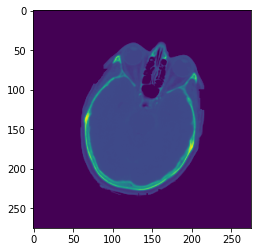

In [ ]:
plt.imshow(bone_input[7])

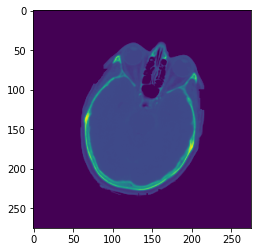

In [ ]:
plt.imshow(brain_input[7])

In [ ]:
filepath="/content/drive/MyDrive/temp/weights-improvement-{epoch:02d}-{accuracy:02f}.hdf5"
earlystop=EarlyStopping(monitor='accuracy', mode='max',  patience=4)
csv_logger = CSVLogger("/content/drive/MyDrive/temp/model_history_log.csv", append=True)

checkpoint = ModelCheckpoint(filepath, monitor='accuracy', save_best_only=True, mode='max')
callbacks_list = [earlystop,checkpoint,csv_logger]


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

 #It is useful when ram is limited but it is slow i got same result in 11s while this took 42 sec so not using it for time being
def generator(samples, batch_size=32):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        shuffle(samples)
 
        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size &lt;= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]
 
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            X_trains=[]
            X_trainss=[]
            y_train = []
            
            # For each example
            for batch_sample in batch_samples:
                # Load image (X)
                filename = '/content/temp/bone_window/'+batch_sample[0]+'.png'
                image = cv2.imread(filename)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Read label (y)
                y = [x for x in batch_sample[2:]]
                X_train.append(image)
                y_train.append(y)

                filename = '/content/temp/brain_window/'+batch_sample[0]+'.png'
                image = cv2.imread(filename)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                X_trains.append(image)

                filename = '/content/temp/blood_window/'+batch_sample[0]+'.png'
                image = cv2.imread(filename)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                X_trainss.append(image)
 
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.true_divide(X_train,255.0)
            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

            X_trains = np.true_divide(X_trains,255.0)
            X_trains = X_trains.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

            X_trainss = np.true_divide(X_trainss,255.0)
            X_trainss = X_trainss.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)


            # X_train=tf.convert/_to_tensor(X_train)
            y_train = np.array(y_train)
            # y_train=tf.convert_to_tensor(y_train)
            # X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
            # The generator-y part: yield the next training batch            
            yield [X_train,X_trains,X_trainss], y_train

            
train_datagen = generator(samples[0:int(len(samples)*0.8)],batch_size=32)
validation_generator = generator(samples[int(len(samples)*0.8):], batch_size=32)

label=len(samples)


In [ ]:
x,y = next(train_datagen)

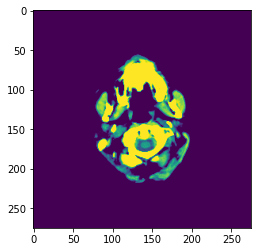

In [ ]:
plt.imshow(x[1][0])

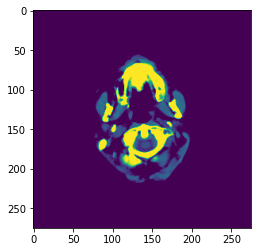

In [ ]:
plt.imshow(x[2][0])

In [ ]:
#batch=32
# steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
# validation_steps = TotalvalidationSamples / ValidationBatchSize
history=model.fit(
        train_datagen,
        epochs=11,steps_per_epoch=int(0.8*label/32),validation_data=validation_generator
      ,callbacks=callbacks_list,validation_steps=int(0.2*label/32))
# history=model.fit([bone_input,brain_input,blood_input],label,epochs=11,batch_size=32,
#                   steps_per_epoch=int(0.8*label.shape[0]/32),
#                   callbacks=callbacks_list,validation_split=0.1,validation_steps=int(0.1*label.shape[0]/32),
#                   shuffle=True,)


Epoch 1/11
353/353 [==============================] - 179s 493ms/step - loss: 0.3674 - accuracy: 0.1845 - val_loss: 0.4944 - val_accuracy: 0.1946
Epoch 2/11
353/353 [==============================] - 173s 489ms/step - loss: 0.3054 - accuracy: 0.2331 - val_loss: 0.3374 - val_accuracy: 0.2464
Epoch 3/11
353/353 [==============================] - 172s 489ms/step - loss: 0.2817 - accuracy: 0.2528 - val_loss: 0.3991 - val_accuracy: 0.2344
Epoch 4/11
353/353 [==============================] - 172s 489ms/step - loss: 0.2615 - accuracy: 0.2668 - val_loss: 0.4353 - val_accuracy: 0.2049
Epoch 5/11
353/353 [==============================] - 172s 488ms/step - loss: 0.2394 - accuracy: 0.2902 - val_loss: 0.3275 - val_accuracy: 0.2393
Epoch 6/11
353/353 [==============================] - 173s 491ms/step - loss: 0.2194 - accuracy: 0.3042 - val_loss: 0.3352 - val_accuracy: 0.2436
Epoch 7/11
353/353 [==============================] - 173s 490ms/step - loss: 0.2025 - accuracy: 0.3180 - val_loss: 0.3206 -

In [4]:
new_model = tf.keras.models.load_model('saved_model\\temp\\weights-improvement-06-0.633729.hdf5')

In [ ]:

history=new_model.fit(
        train_datagen,
        epochs=100,steps_per_epoch=int(0.8*label/32),validation_data=validation_generator
      ,callbacks=callbacks_list,validation_steps=int(0.2*label/32))



Epoch 1/100
353/353 [==============================] - 175s 488ms/step - loss: 0.0120 - accuracy: 0.6055 - val_loss: 0.4577 - val_accuracy: 0.4297
Epoch 2/100
353/353 [==============================] - 172s 488ms/step - loss: 0.0128 - accuracy: 0.6086 - val_loss: 0.4131 - val_accuracy: 0.4901
Epoch 3/100
353/353 [==============================] - 172s 488ms/step - loss: 0.0131 - accuracy: 0.6115 - val_loss: 0.4364 - val_accuracy: 0.4776
Epoch 4/100
353/353 [==============================] - 170s 482ms/step - loss: 0.0134 - accuracy: 0.5670 - val_loss: 0.9065 - val_accuracy: 0.4386
Epoch 5/100
353/353 [==============================] - 169s 480ms/step - loss: 0.0147 - accuracy: 0.5983 - val_loss: 0.4409 - val_accuracy: 0.5092
Epoch 6/100
353/353 [==============================] - 172s 486ms/step - loss: 0.0117 - accuracy: 0.6337 - val_loss: 0.4765 - val_accuracy: 0.5000
Epoch 7/100
353/353 [==============================] - 170s 480ms/step - loss: 0.0112 - accuracy: 0.6072 - val_loss: 0

In [9]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/temp/weights-improvement-06-0.633729.hdf5')

In [5]:
filename = '/content/temp/bone_window/'+'ID_00b46c6bc'+'.png'  
filename='data\\image\\bone.png'            
X_train = []
image = cv2.imread(filename)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
X_train.append(image)
X_train = np.array(X_train)/255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

filenames = '/content/temp/brain_window/'+'ID_00b46c6bc'+'.png'  
filenames='data\\image\\brain.png'            
           
X_trains = []
image = cv2.imread(filename)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
X_trains.append(image)
X_trains = np.array(X_train)/255.0
X_trains = X_trains.reshape(X_trains.shape[0], X_trains.shape[1], X_trains.shape[2], 1)

filenames = '/content/temp/blood_window/'+'ID_00b46c6bc'+'.png'
filenames='data\\image\\blood.png'            

X_trainss = []
image = cv2.imread(filenames)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
X_trainss.append(image)
X_trainss = np.array(X_trainss)/255.0
X_trainss = X_trainss.reshape(X_trains.shape[0], X_trains.shape[1], X_trains.shape[2], 1)

y=new_model.predict([X_train,X_trains,X_trainss])

In [6]:

print(y[0])


[9.0719412e-05 1.0366001e-05 3.5513742e-10 1.2499094e-04 2.7188452e-07]


In [38]:
y=y[0]

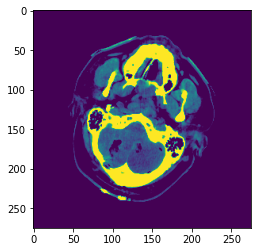

In [19]:
plt.imshow(image)

In [39]:
if( y[0]>0.5): 
  print('epidural')
if( y[1]>0.5): 
  print('intraparenchymal')
if( y[2]>0.5): 
  print('intraventricular')
if( y[3]>0.5): 
  print('subarachnoid')
if( y[4]>0.5): 
  print('subdural')


intraparenchymal


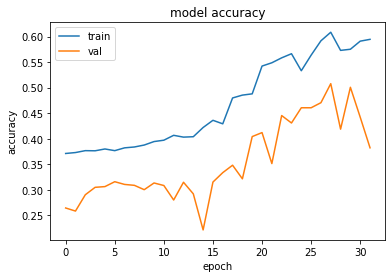

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
filename = '/content/temp/bone_window/'+'ID_00b46c6bc'+'.png'              
X_train = []
image = cv2.imread(filename)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
X_train.append(image)
X_train = np.array(X_train)/255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

filenames = '/content/temp/brain_window/'+'ID_00b46c6bc'+'.png'             
X_trains = []
image = cv2.imread(filename)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
X_trains.append(image)
X_trains = np.array(X_train)/255.0
X_trains = X_trains.reshape(X_trains.shape[0], X_trains.shape[1], X_trains.shape[2], 1)

filenames = '/content/temp/blood_window/'+'ID_00b46c6bc'+'.png'
X_trainss = []
image = cv2.imread(filenames)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
X_trainss.append(image)
X_trainss = np.array(X_trainss)/255.0
X_trainss = X_trainss.reshape(X_trains.shape[0], X_trains.shape[1], X_trains.shape[2], 1)

new_model.predict([X_train,X_trains,X_trainss])

array([[2.7557217e-06, 9.4528961e-01, 1.2127192e-08, 3.5268458e-05,
        3.4645410e-08]], dtype=float32)

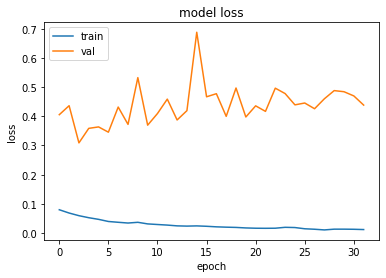

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()